# PYTHON ASSIGMENT 3

- Name : Ahmad Firdaus Zulva
- Course : Introduction to Python for Data Science
- Code : PYTN-KS04-001

## Overview About Project

Project kali ini mengola data yang berkaitan dengan kampanye pemasaran dari perbankan yang ada di Portugal. Kampanye ini melalui saluran telefon. Seringkali lebih dari satu kontak ke klien yang sama diperlukan untuk mengakses apakah produk deposito berjangka panjang akan diterma (yes) atau ditolak (no) berlangganan.

Terdapat 4 dataset, yakni :
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

Tujuan kita mengolah data ini adalah untuk memprediksi apakah klien tersebut akan berlangganan deposit (variabel y)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [2]:
df=pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Preprocessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()

0

Dari hasil preprosessing didapatkan beberapa poin penting 
1. terdapat 17 kolom dan 45211 data dengan 2 tipe kategori data yakni int64 dan object.
2. tidak ditemukan data yang missing values.
3. tidak ditemukan data yang ganda.


## Numerical Processing 

In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
corr = df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Dari tabel describe diatas terlihat bahwa adanya beberapa variabel yang memiliki nilai outlier. untuk memastikan hal tersebut kita akan mengecek menggunakan box plot

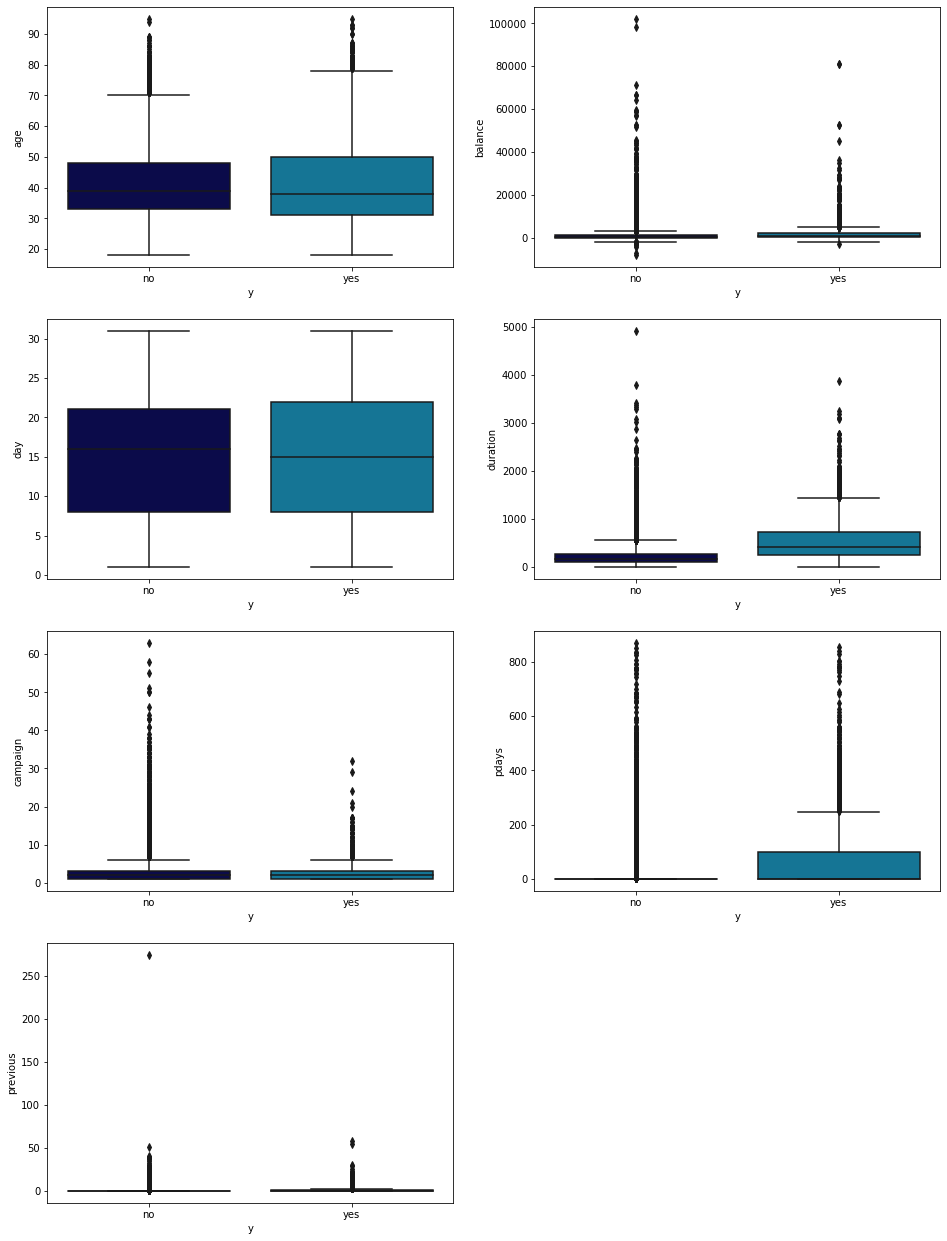

In [10]:
plt.figure(figsize=(16, 22))

plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="ocean")

plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="ocean")

plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="ocean")

plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="ocean")

plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="ocean")

plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="ocean")

plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="ocean")
plt.show()


Kita akan mengurangi outlier yang ada dengan menggunakan metode IQR

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
print(IQR)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [12]:
df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]


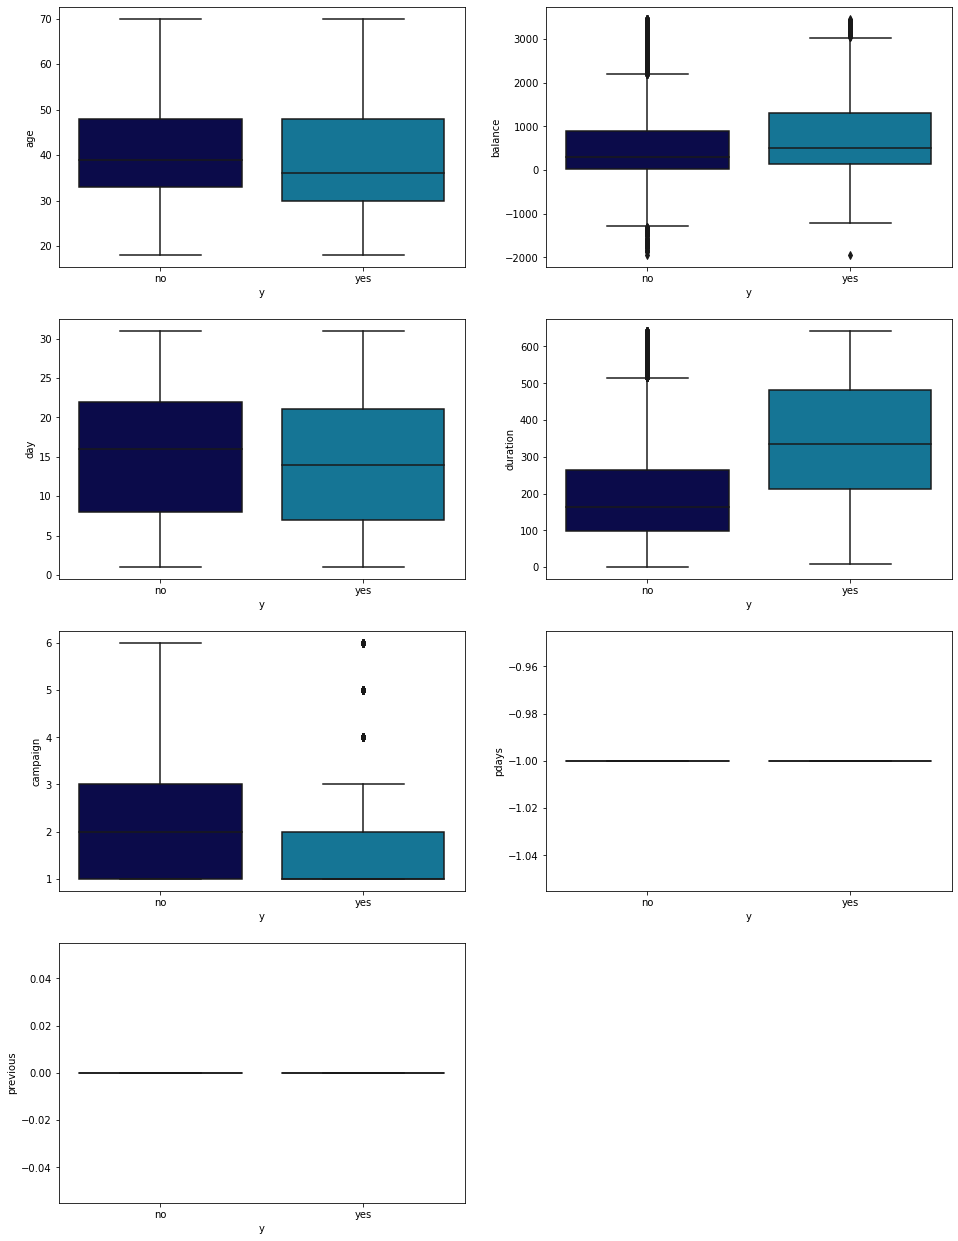

In [13]:
plt.figure(figsize=(16, 22))

plt.subplot(4, 2, 1)
sns.boxplot(x="y", y="age", data=df, palette="ocean")

plt.subplot(4, 2, 2)
sns.boxplot(x="y", y="balance", data=df, palette="ocean")

plt.subplot(4, 2, 3)
sns.boxplot(x="y", y="day", data=df, palette="ocean")

plt.subplot(4, 2, 4)
sns.boxplot(x="y", y="duration", data=df, palette="ocean")

plt.subplot(4, 2, 5)
sns.boxplot(x="y", y="campaign", data=df, palette="ocean")

plt.subplot(4, 2, 6)
sns.boxplot(x="y", y="pdays", data=df, palette="ocean")

plt.subplot(4, 2, 7)
sns.boxplot(x="y", y="previous", data=df, palette="ocean")
plt.show()


In [14]:
corr = df.corr()
corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.082486,-0.009852,-0.049831,0.043667,NaN,NaN
balance,0.082486,1.000000,0.001735,0.015164,-0.017398,NaN,NaN
day,-0.009852,0.001735,1.000000,-0.034670,0.119663,NaN,NaN
duration,-0.049831,0.015164,-0.034670,1.000000,-0.066774,NaN,NaN
campaign,0.043667,-0.017398,0.119663,-0.066774,1.000000,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


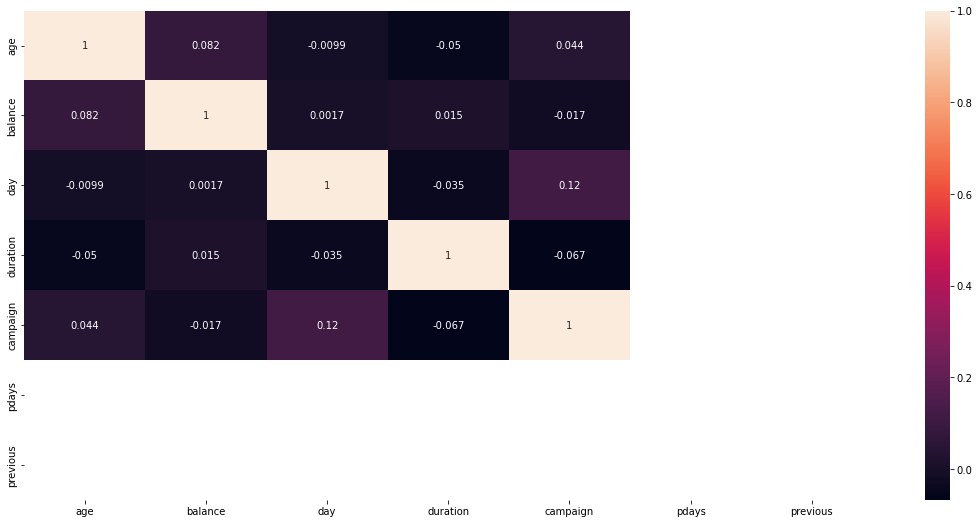

In [16]:
plt.subplots(figsize=(19, 9))
sns.heatmap(corr, annot=True)
plt.show()

## Categorical Connection

In [17]:
kategori = df.select_dtypes(include=["object"]).columns.values
print(kategori)

['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome' 'y']


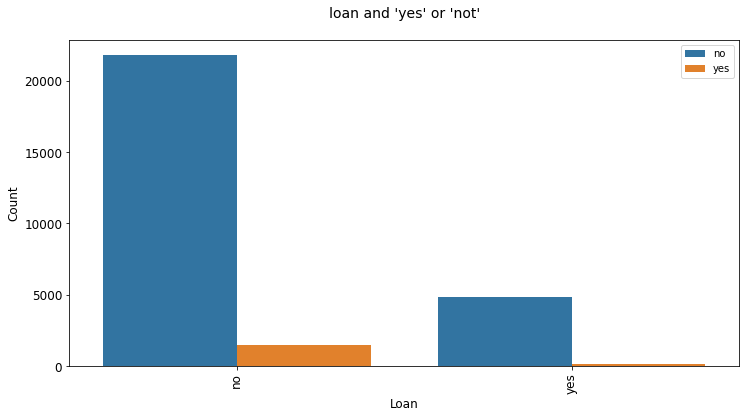

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x="loan", hue="y", data=df,)
plt.xlabel("Loan", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("loan and 'yes' or 'not'\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

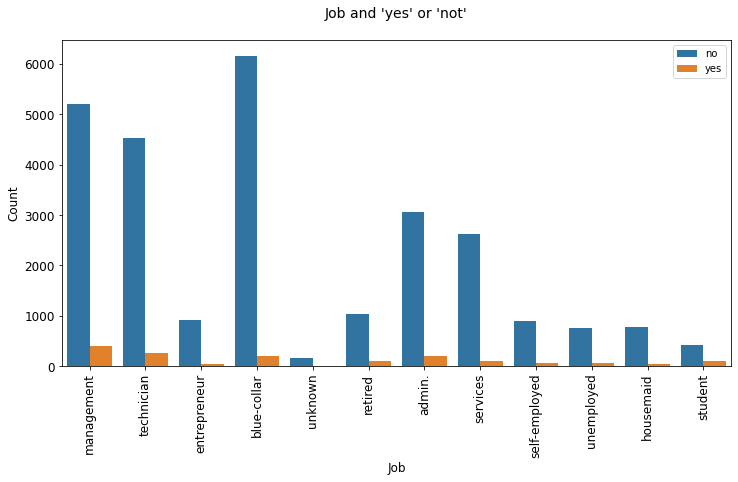

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x="job", hue="y", data=df)
plt.xlabel("Job", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Job and 'yes' or 'not'\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

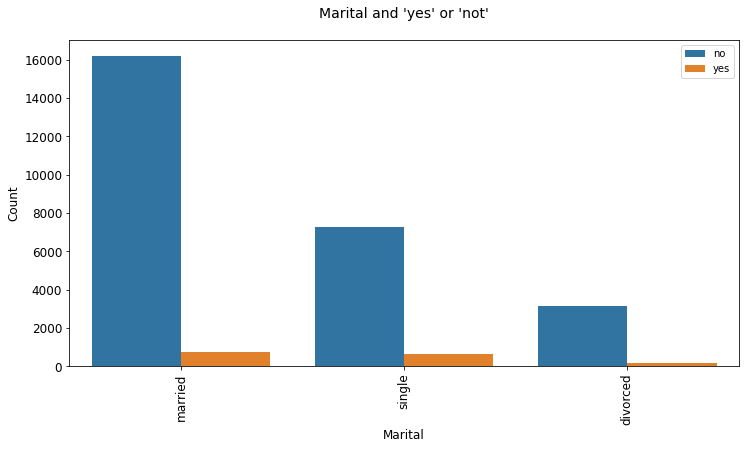

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(x="marital", hue="y", data=df)
plt.xlabel('Marital', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Marital and 'yes' or 'not'\n", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

## Modeling 

In [20]:
X = df.drop("y", axis=1)
#data target
y = df["y"]

In [21]:
X = pd.get_dummies(X)

In [22]:
X

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,1428,16,333,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45202,34,557,17,224,1,-1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
45203,23,113,17,266,1,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
45205,25,505,17,386,2,-1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [51]:
#splitting X dan y menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19735, 48)
(8458, 48)
(19735,)
(8458,)


In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Naive Bayesian

In [86]:
#membuat model naive bayes
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [87]:
y_pred = NB.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

In [88]:
mconf = confusion_matrix(y_test, y_pred)
mconf

array([[7323,  670],
       [ 248,  217]], dtype=int64)

<AxesSubplot:>

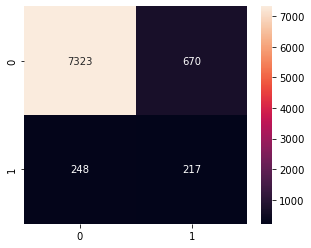

In [89]:
plt.figure(figsize=(5,4))
sns.heatmap(mconf, annot=True,fmt=".0f")

In [90]:
akurat=accuracy_score(y_test, y_pred)
akurat

0.891463703003074

In [91]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.97      0.92      0.94      7993
         yes       0.24      0.47      0.32       465

    accuracy                           0.89      8458
   macro avg       0.61      0.69      0.63      8458
weighted avg       0.93      0.89      0.91      8458



### Logistic Regressions

In [92]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [93]:
#predi
y_pred = LR.predict(X_test)

In [94]:
#confusion Matrix
mconf = confusion_matrix(y_test, y_pred)
mconf

array([[7925,   68],
       [ 371,   94]], dtype=int64)

<AxesSubplot:>

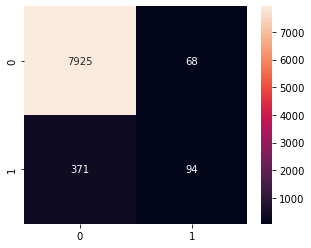

In [95]:
plt.figure(figsize=(5,4))
sns.heatmap(mconf, annot=True, fmt=".0f")

In [96]:
akurat=accuracy_score(y_test, y_pred)
akurat

0.9480964767084417

In [97]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

          no       0.96      0.99      0.97      7993
         yes       0.58      0.20      0.30       465

    accuracy                           0.95      8458
   macro avg       0.77      0.60      0.64      8458
weighted avg       0.93      0.95      0.94      8458



###  K-Nearest Neighbors

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred = knn.predict(X_test)

In [100]:
mconf = confusion_matrix(y_test, y_pred)
mconf

array([[7893,  100],
       [ 375,   90]], dtype=int64)

<AxesSubplot:>

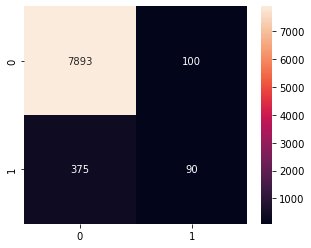

In [101]:
plt.figure(figsize=(5,4))
sns.heatmap(mconf, annot=True, fmt=".0f")

In [105]:
akurat=accuracy_score(y_test, y_pred)
akurat

0.9488058642705132

In [106]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      7993
         yes       0.70      0.12      0.21       465

    accuracy                           0.95      8458
   macro avg       0.82      0.56      0.59      8458
weighted avg       0.94      0.95      0.93      8458



### Support Vector Machine

In [110]:
# model
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [111]:
y_pred = svm.predict(X_test)

In [112]:
mconf = confusion_matrix(y_test, y_pred)
mconf

array([[7968,   25],
       [ 408,   57]], dtype=int64)

<AxesSubplot:>

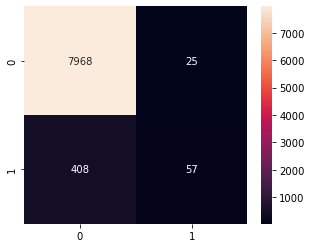

In [113]:
plt.figure(figsize=(5,4))
sns.heatmap(mconf, annot=True, fmt=".0f")

In [114]:
akurat=accuracy_score(y_test, y_pred)
akurat

0.9488058642705132

In [115]:
print("Classification Report\n", classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

          no       0.95      1.00      0.97      7993
         yes       0.70      0.12      0.21       465

    accuracy                           0.95      8458
   macro avg       0.82      0.56      0.59      8458
weighted avg       0.94      0.95      0.93      8458



### Decision Tree

In [131]:
# Training model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [132]:
# predictions testing set
y_pred = tree.predict(X_test)

In [133]:
#confusion Matrix
mconf = confusion_matrix(y_test, y_pred)
mconf

array([[7656,  337],
       [ 291,  174]], dtype=int64)

<AxesSubplot:>

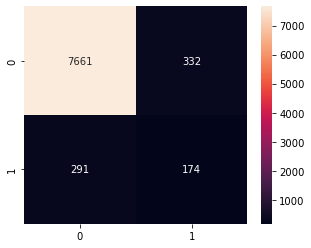

In [134]:
plt.figure(figsize=(5,4))
sns.heatmap(mconf, annot=True,fmt=".0f",)

In [135]:
akurat=accuracy_score(y_test, y_pred)
akurat

0.9257507685031923

In [136]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.96      0.96      0.96      7993
         yes       0.34      0.37      0.36       465

    accuracy                           0.93      8458
   macro avg       0.65      0.67      0.66      8458
weighted avg       0.93      0.93      0.93      8458



### Random Forest

In [141]:
# Training model training set
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
# Making predictions on the testing set
y_pred = rf.predict(X_test)

In [139]:
# confusion matrix 
mconf = confusion_matrix(y_test, y_pred)
mconf

array([[7942,   51],
       [ 380,   85]], dtype=int64)

<AxesSubplot:>

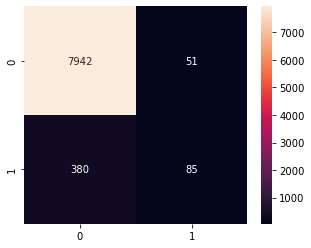

In [143]:
plt.figure(figsize=(5,4))
sns.heatmap(mconf, annot=True,fmt=".0f")

In [145]:
akurat=accuracy_score(y_test, y_pred)
akurat

0.9493970205722393

In [144]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.99      0.97      7993
         yes       0.65      0.17      0.27       465

    accuracy                           0.95      8458
   macro avg       0.80      0.58      0.62      8458
weighted avg       0.94      0.95      0.94      8458



## Kesimpulan

- Dari beberapa model yang telah dibuat berdasarkan  metode klasifikasi, didapat metode klasifikasi Random Forest (RF) memiliki akurasi yang lebih tinggi daripada metode yang lain yaitu 94,93%.
- Pelanggan dengan status pernikahan "menikah" terlihat lebih banyak yang tidak berlangganan deposit berjangka dibandingkan pelanggan yang berstatus "single" dan "cerai".
- Kebanyakan pelanggan deposit berjangka bekerja sebagai management dan teknisi